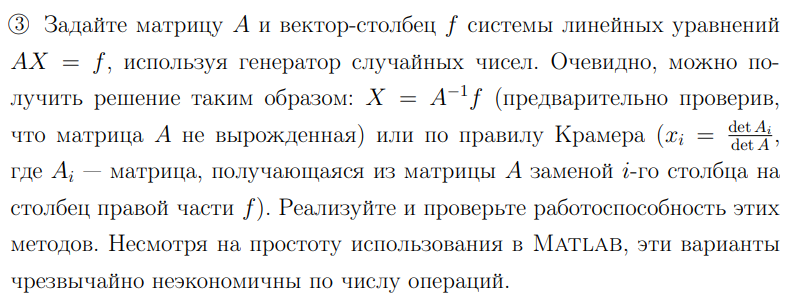

In [240]:
import numpy as np
from numpy.linalg import inv

def kramer(a,b,lent):
    d=np.linalg.det(a)
    x=np.zeros((lent,1))
    for i in range(lent):
        q=a.copy()
        q[:,i]=b.copy()
        x[i]=(np.linalg.det(q))/d
    return x    


A=np.random.randint(100,size=(4,4))
B=np.random.randint(100,size=(1,4))

X=kramer(A,B,4)
print(A)
print("==============")
print(B)
print("==============")
print(X)

print("==============")
d=X-inv(A).dot(B.transpose())
print(d)

[[96 48 99 73]
 [81 81 35 84]
 [72 19 94 18]
 [41 25  4 37]]
[[12 91 53 44]]
[[ 2.44071672]
 [ 2.12703006]
 [-1.19493805]
 [-2.82338878]]
[[-5.77315973e-15]
 [-3.55271368e-15]
 [ 3.10862447e-15]
 [-2.66453526e-15]]


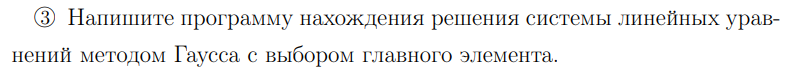

In [120]:
import numpy as np

matrix=np.random.rand(3,4)
print(matrix)

def makeIdentity(matrix):
    # перебор строк в обратном порядке 
    for nrow in range(len(matrix)-1,0,-1):
        row = matrix[nrow]
        for upper_row in matrix[:nrow]:
            factor = upper_row[nrow]
            # вычитать строки не нужно, так как в row только два элемента отличны от 0:
            # в последней колонке и на диагонали
            
            # вычитание в последней колонке
            upper_row[-1] -= factor*row[-1]
            # вместо вычитания 1*factor просто обнулим коэффициент в соотвествующей колонке. 
            upper_row[nrow] = 0
    return matrix

def makeTrianglePivot(matrix):
    for nrow in range(len(matrix)):
        # nrow равен номеру строки
        # np.argmax возвращает номер строки с максимальным элементом в уменьшенной матрице
        # которая начинается со строки nrow. Поэтому нужно прибавить nrow к результату
        pivot = nrow + np.argmax(abs(matrix[nrow:, nrow]))
        if pivot != nrow:
            # swap
            # matrix[nrow], matrix[pivot] = matrix[pivot], matrix[nrow] - не работает.
            # нужно переставлять строки именно так, как написано ниже
            # matrix[[nrow, pivot]] = matrix[[pivot, nrow]]
            matrix[nrow], matrix[pivot] = matrix[pivot], np.copy(matrix[nrow])
        row = matrix[nrow]
        divider = row[nrow] # диагональный элемент
        if abs(divider) < 1e-10:
            # почти нуль на диагонали. Продолжать не имеет смысла, результат счёта неустойчив
            raise ValueError("Матрица несовместна")
        # делим на диагональный элемент.
        row /= divider
        # теперь надо вычесть приведённую строку из всех нижележащих строчек
        for lower_row in matrix[nrow+1:]:
            factor = lower_row[nrow] # элемент строки в колонке nrow
            lower_row -= factor*row # вычитаем, чтобы получить ноль в колонке nrow
    return matrix

def gaussSolvePivot(A, b=None):
    """Решает систему линейных алгебраических уравнений Ax=b
    Если b is None, то свободные коэффициенты в последней колонке"""
    shape = A.shape
    assert len(shape) == 2, ("Матрица не двумерная", shape) # двумерная матрица
    A = A.copy()
    if b is not None:
        assert shape[0] == shape[1], ("Матрица не квадратная", shape)
        assert b.shape == (shape[0],), ("Размерность свободных членов не соответствует матрица", shape, b.shape)
        # добавляем свободные члены дополнительным столбцом
        A = np.c_[A, b]
    else:
        # Проверяем, что квадратная плюс столбец
        assert shape[0]+1 == shape[1], ("Неверный формат матрицы", shape)
    makeTrianglePivot(A)
    makeIdentity(A)
    return A[:,-1]

gaussSolvePivot(matrix)

[[0.82425529 0.35591387 0.57621567 0.7657511 ]
 [0.81539419 0.60177088 0.28310564 0.39877151]
 [0.12159961 0.90132682 0.59339867 0.90397509]]


array([-0.07020191,  0.12029864,  1.35504723])

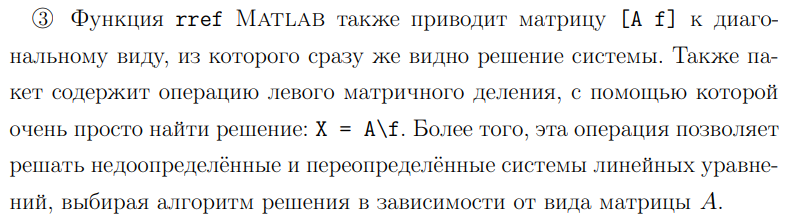

In [217]:
import numpy as np
import sympy as sm

A = np.matrix([[56, 0, 1], [2, 3, 4], [-1, -3, 54]])
B = np.matrix([[1], [2], [-1]])
AB= sm.Matrix([[56, 0, 1 ,1], [2, 3, 4 ,2], [-1, -3, 54 , -1]])
print(A)
print("============")
print(B)
print("============")
print(AB)
print("============")

Q=AB.copy()
Qr=np.matrix(Q.rref()[0])

X=Qr[:,3]
d=X-np.linalg.inv(A).dot(B)
print(X)
print("============")
print(d)
print("============")





[[56  0  1]
 [ 2  3  4]
 [-1 -3 54]]
[[ 1]
 [ 2]
 [-1]]
Matrix([[56, 0, 1, 1], [2, 3, 4, 2], [-1, -3, 54, -1]])
[[57/3247]
 [6160/9741]
 [55/3247]]
[[3.46944695195361e-18]
 [1.11022302462516e-16]
 [0]]


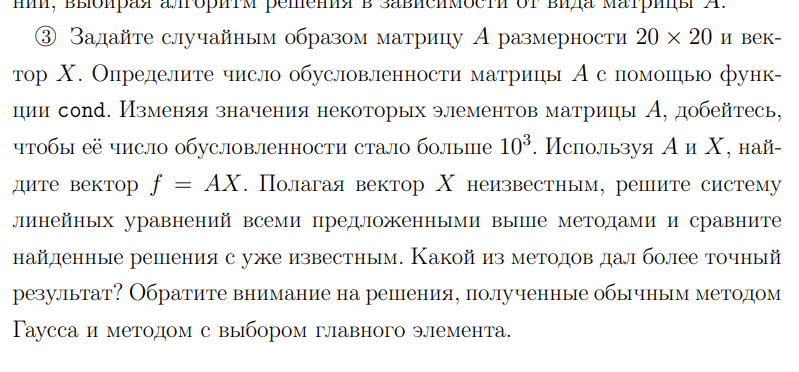

In [250]:
cond=0;
X=np.random.rand(20)
Md=[]

while cond<1000:
    A=np.random.rand(20,20)
    cond=np.linalg.cond(A)
    
f=np.dot(A,X).copy() 
Ai = np.linalg.inv(A).copy()
X1=np.dot(Ai,f).copy()
dX1=np.abs(X-X1).copy();
Md=Md+[np.max(dX1)]

X2=kramer(A,f,20).copy();
dX2=np.abs(X-X2).copy();
Md=Md+[np.max(dX2)]

E=A.copy()
E = np.insert(E,20,f,1).copy()
X3=gaussSolvePivot(E).copy()
dX3=np.abs(X-X3).copy();
Md=Md+[np.max(dX3)];

Q=A.copy()
Q = np.insert(Q,20,f,1).copy()
Q=sm.Matrix(Q).copy()
Qr=Q.rref();
X4=Qr[0][1,20];
dX4=np.abs(X-X4).copy();
Md=Md+[np.max(dX4)]

X5=np.linalg.inv(A).dot(f).copy()
dX5=np.abs(X-X).copy();
Md=Md+[np.max(dX5)]

print(cond)
print(Md)
    

2220.0410822161166
[1.5509815654013437e-13, 0.9241392645773953, 5.96189764223709e-14, 0.869795840800005, 0.0]
